## LINEAR REGRESSION WITH PYTHON
### Predicting the percentage of marks a student is expected to score based on number of study hours

In [48]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [49]:
# Read data from the given url
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Plot our dataset to analyze the relationship

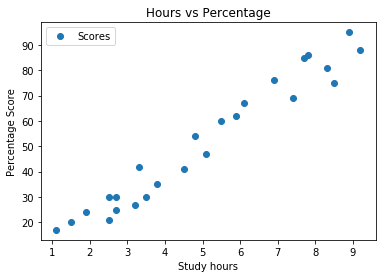

In [50]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Study hours')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Preparing the data

Dividing into inputs and outputs

In [51]:
a = data.iloc[:, :-1].values  #input
b = data.iloc[:, 1].values    #output

#### Splitting the data into training and test sets. 
Use Scikit-Learn's built-in train_test_split() method

In [52]:
from sklearn.model_selection import train_test_split  
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0) 

## Training the Algorithm

In [53]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(a_train, b_train) 

print("Model Trained!")

Model Trained!


#### Plotting the regression line

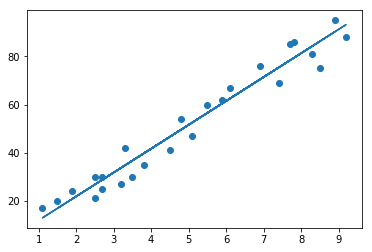

In [54]:
reg_line = regressor.coef_*a+regressor.intercept_

# Plotting for test data
plt.scatter(a, b)
plt.plot(a, reg_line);
plt.show()

## Making Predictions


In [55]:
b_pred = regressor.predict(a_test) # Predicting scores

#### Comparing actual and predicted values

In [56]:
df = pd.DataFrame({'Actual': b_test, 'Predicted': b_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### For predicting the score based on our own study hours

In [57]:
hours = 9.25
my_pred = regressor.predict(hours)
print("No of hours studied = ",hours)
print("Predicted Score = ",my_pred[0])

No of hours studied =  9.25
Predicted Score =  93.69173248737538


## Evaluating the model
#### Using the mean-square error

In [58]:
from sklearn import metrics  
mae=metrics.mean_absolute_error(b_test, b_pred)
print('The Mean Absolute Error for our model is:',mae) 

The Mean Absolute Error for our model is: 4.183859899002975
